# <center> Cuisine Data Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Cuisine_rating.csv')
data

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Area code,200.0,141.060,26.130257,101.0,123.00,135.0,158.00,199.0
YOB,200.0,1984.830,16.809339,1955.0,1971.00,1987.0,2000.00,2009.0
Budget,200.0,3.815,1.056578,1.0,3.00,4.0,5.00,5.0
Food Rating,200.0,3.220,1.411226,1.0,2.00,3.0,5.00,5.0
Service Rating,200.0,3.230,1.526022,1.0,2.00,3.0,5.00,5.0
Overall Rating,200.0,3.225,1.079445,1.0,2.50,3.0,4.00,5.0


In [5]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [6]:
data.size

3000

In [7]:
data.shape

(200, 15)

In [8]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
data.rename(columns={'Alcohol ':'Alcohol','User ID':'UserID','Area code':'Areacode','Marital Status':'Maritalstatus','Food Rating':'Foodrating','Service Rating':'Servicerating','Overall Rating':'Overallrating','Often A S':'OftenAS'},inplace=True)

In [11]:
data

,UserID,Areacode,Location,Gender,YOB,Maritalstatus,Activity,Budget,Cuisines,Alcohol,Smoker,Foodrating,Servicerating,Overallrating,OftenAS
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


#### Creating new column

In [12]:
data['Age']=[2022 - YOB for YOB in data['YOB']]
data.head(10)

,UserID,Areacode,Location,Gender,YOB,Maritalstatus,Activity,Budget,Cuisines,Alcohol,Smoker,Foodrating,Servicerating,Overallrating,OftenAS,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27


#### Droping the column

In [13]:
data.drop(columns=['UserID','Areacode','YOB'],inplace=True)

In [14]:
data

,Location,Gender,Maritalstatus,Activity,Budget,Cuisines,Alcohol,Smoker,Foodrating,Servicerating,Overallrating,OftenAS,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"St. George,NY",Female,Single,Professional,4,French,Never,Socially,1,2,1.5,No,40
196,"Upper West Side,NY",Female,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,22
197,"St. George,NY",Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
198,"St. George,NY",Male,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,20


#### Value Counts

In [15]:
data.value_counts('Gender')

Gender
Male      118
Female     82
dtype: int64

In [16]:
data.value_counts('Maritalstatus')

Maritalstatus
Single      100
Married      86
Divorced     14
dtype: int64

#### Groupby

In [17]:
Location_Budget_Sum = data.groupby(['Location'])['Budget'].mean()
Location_Budget_Sum

Location
Cedar Hill, NY        4.000000
Central Park,NY       3.333333
Central Park,ny       3.500000
China Town, NY        3.454545
Market City, MY       1.000000
Market City, NY       3.900000
Riverdale,NY          4.285714
St. George,NY         3.978261
Upper East Side,NY    3.866667
Upper West Side,NY    4.000000
Name: Budget, dtype: float64

In [18]:
data.Location.unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

#### Custom function to create location wise dataframe

In [19]:
def sort_Location(Location):
    data_Location=data[data.Location==Location]
    data_Location.drop(columns='Location',inplace=True)
    return data_Location

In [20]:
Upper_East_Side_NY=sort_Location('Upper East Side,NY')

In [21]:
Upper_East_Side_NY

,Gender,Maritalstatus,Activity,Budget,Cuisines,Alcohol,Smoker,Foodrating,Servicerating,Overallrating,OftenAS,Age
0,Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
3,Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
7,Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
15,Female,Married,Student,3,French,Often,Never,4,1,2.5,No,66
17,Male,Single,Student,3,Japanese,Often,Often,1,5,3.0,Yes,18
21,Female,Married,Professional,5,Italian,Socially,Never,1,4,2.5,No,39
38,Male,Married,Student,4,French,Never,Never,2,3,2.5,No,35
51,Female,Single,Student,3,Chinese,Often,Socially,3,2,2.5,No,17
52,Female,Single,Professional,4,Chinese,Never,Often,3,5,4.0,No,48
63,Female,Married,Student,5,Italian,Never,Socially,1,1,1.0,No,33


#### Pivot Table

In [22]:
Data_pivot=data.pivot_table(values='Foodrating',index='Gender',columns='Maritalstatus')

In [23]:
Data_pivot

Maritalstatus,Divorced,Married,Single
Gender,,,
Female,5.000,2.694444,3.65
Male,4.375,2.700000,3.35


#### Crosstab

In [24]:
pd.crosstab(data.Gender,data.Budget)

Budget,1,2,3,4,5
Gender,,,,,
Female,4,2,17,29,30
Male,6,2,44,34,32


#### Histogram & KDE Plot

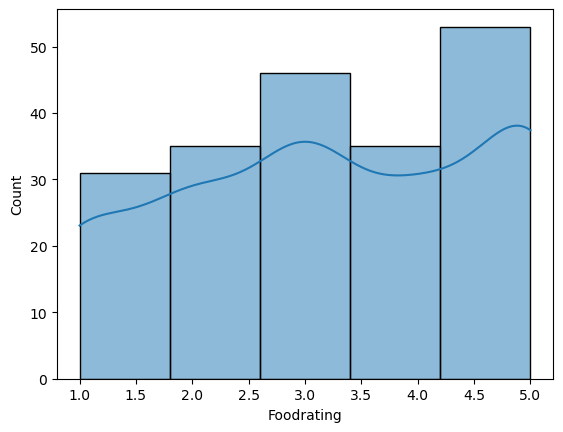

In [25]:
sns.histplot(data=data,x='Foodrating',bins=5,kde=True)
plt.show()

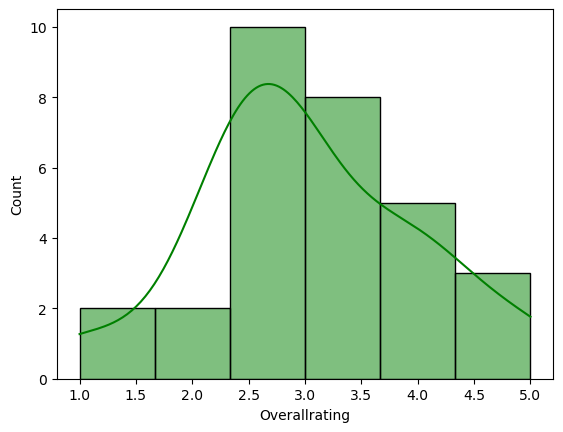

In [26]:
sns.histplot(data=Upper_East_Side_NY,x='Overallrating',kde=True,color='green')
plt.show()

#### Box plot

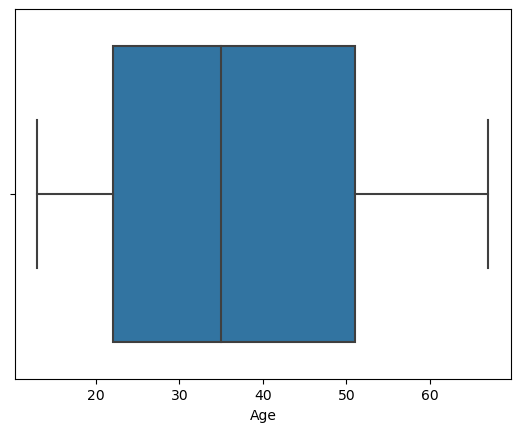

In [54]:
sns.boxplot(data=data,x='Age');

#### Sub Plots

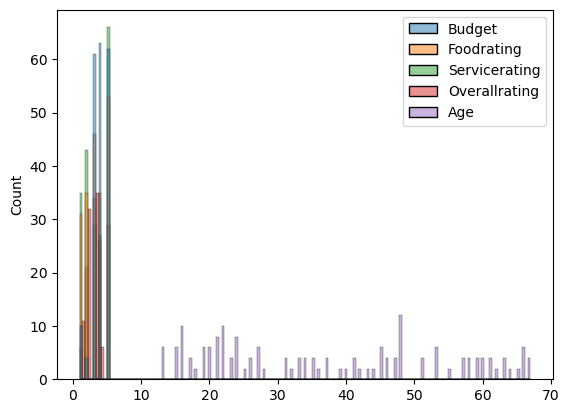

In [55]:
sns.histplot(data=data);

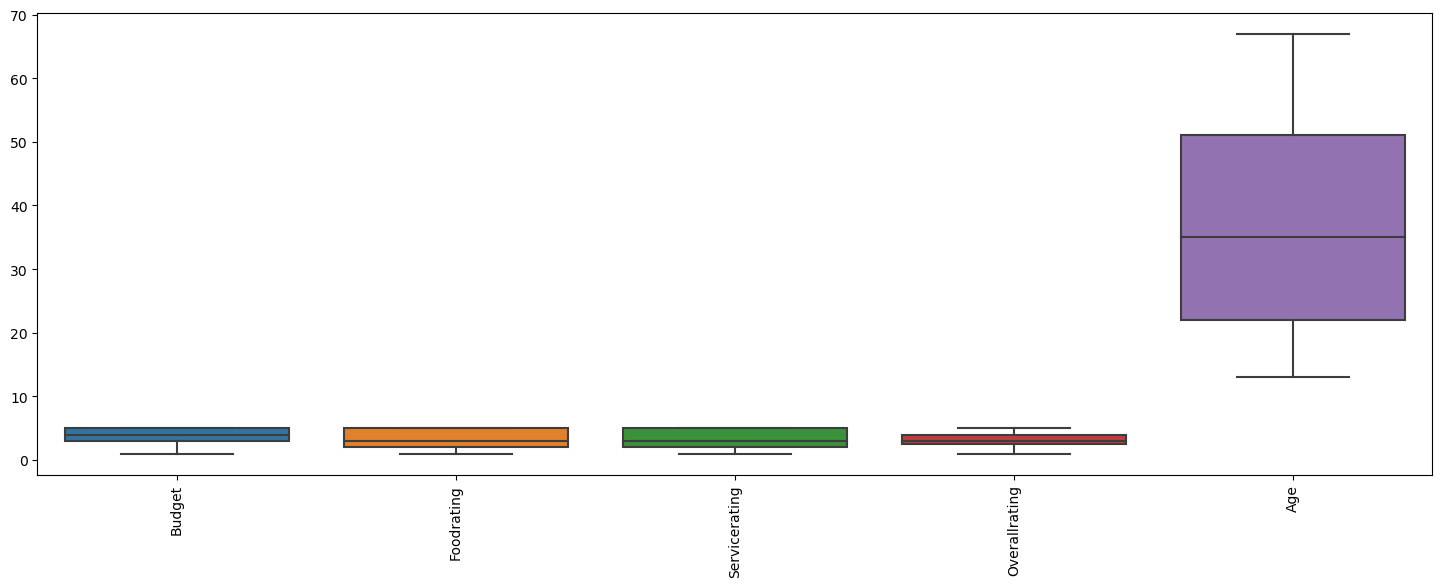

In [56]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.boxplot(data=data);

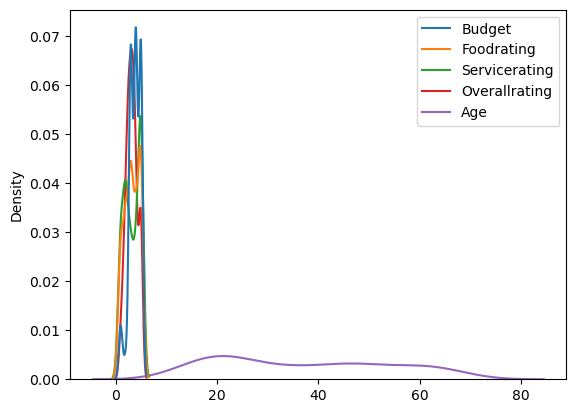

In [57]:
sns.kdeplot(data=data);

#### Count plot

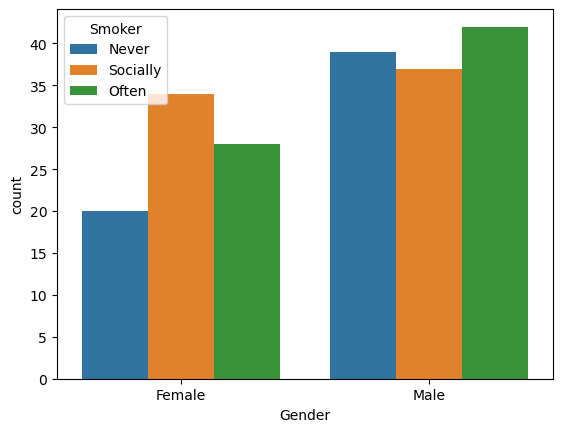

In [27]:
sns.countplot(data=data,x='Gender',hue='Smoker')
plt.show()

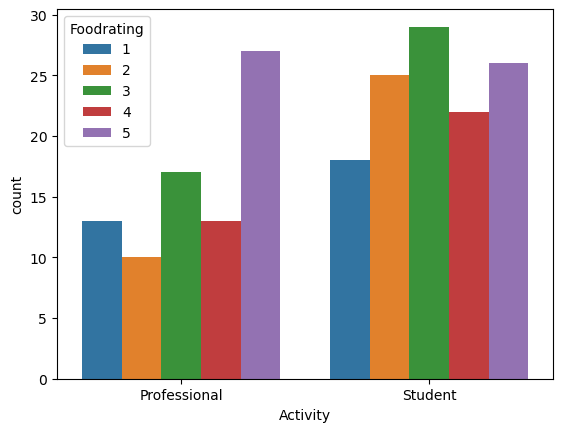

In [36]:
sns.countplot(data=data,x='Activity',hue='Foodrating');

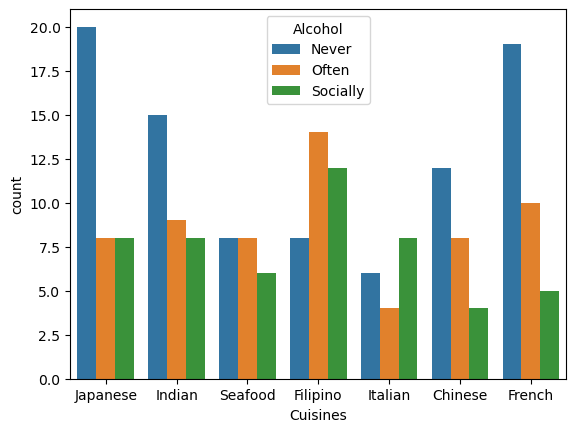

In [37]:
sns.countplot(data=data,x='Cuisines',hue='Alcohol');

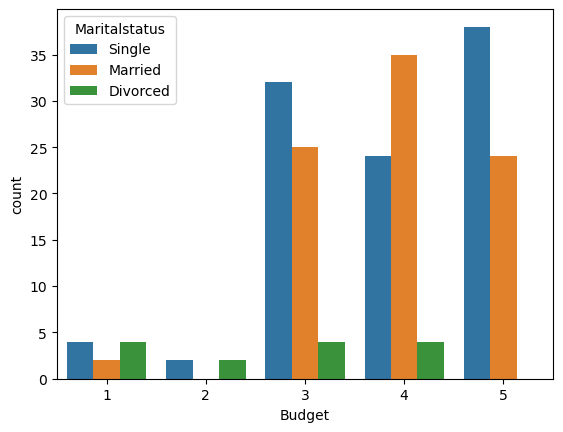

In [45]:
sns.countplot(data=data,x='Budget',hue='Maritalstatus');

#### Pie Chart

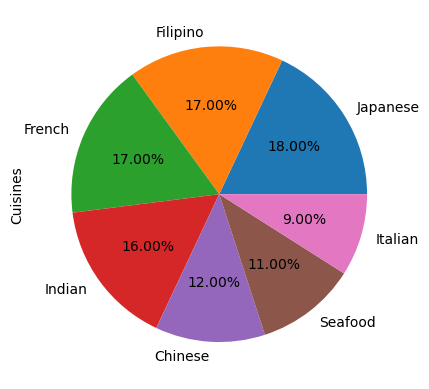

In [39]:
data.Cuisines.value_counts().plot.pie(autopct='%2.2f%%');

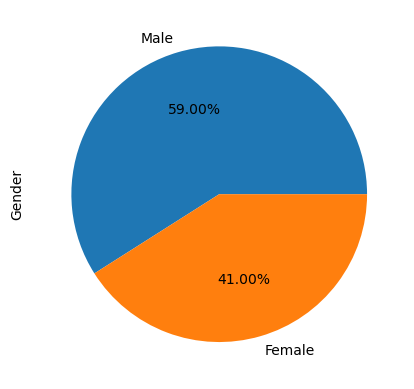

In [28]:
data.Gender.value_counts().plot.pie(autopct ='%1.2f%%');

#### Area chart

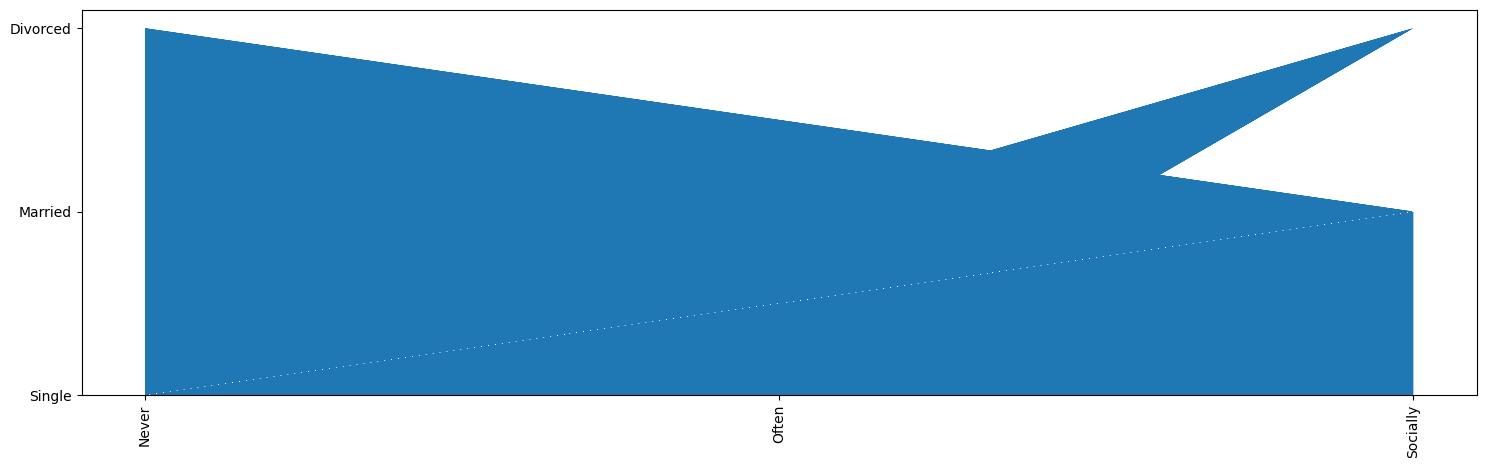

In [66]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
plt.stackplot(data.Alcohol,data.Maritalstatus);

#### Violin Plot

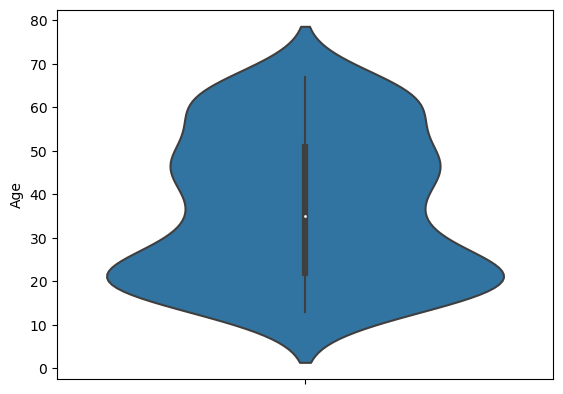

In [33]:
sns.violinplot(data=data,y='Age')
plt.show()

#### Boxen Plot

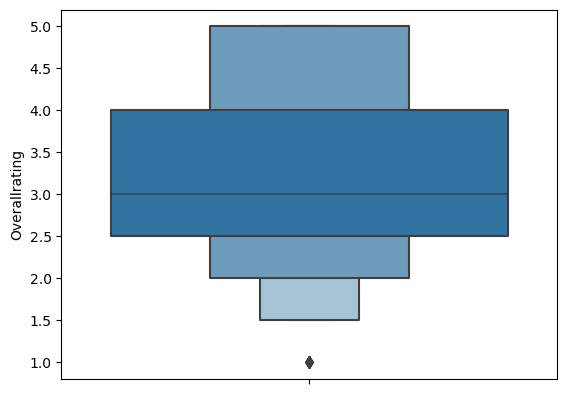

In [34]:
sns.boxenplot(data=data,y='Overallrating');

#### Bar plot

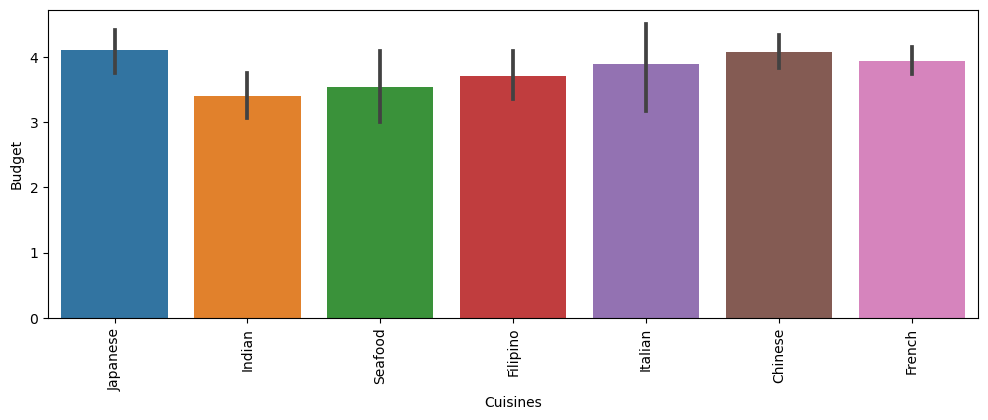

In [41]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
sns.barplot(data=data,x='Cuisines',y='Budget');

#### Line chart

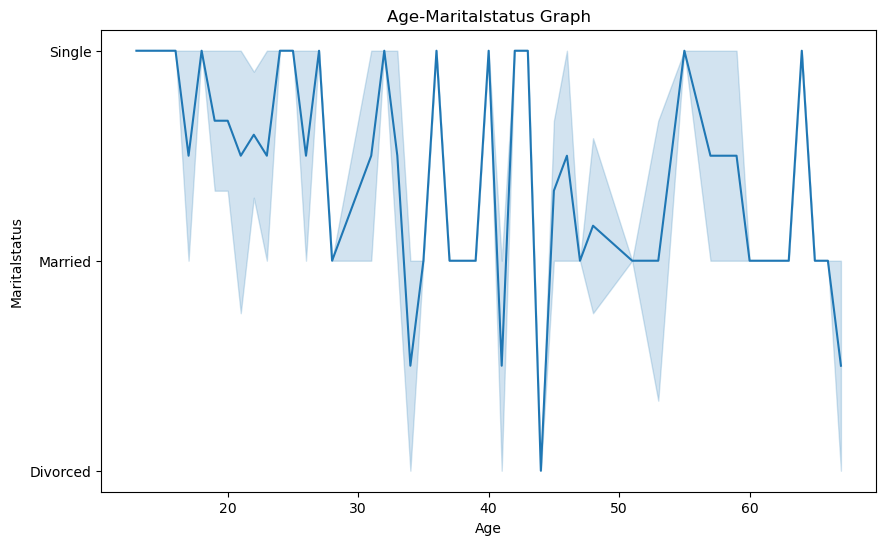

In [69]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Maritalstatus')
plt.title('Age-Maritalstatus Graph')
sns.lineplot(data=data,x='Age',y='Maritalstatus');

#### Swarm Plot

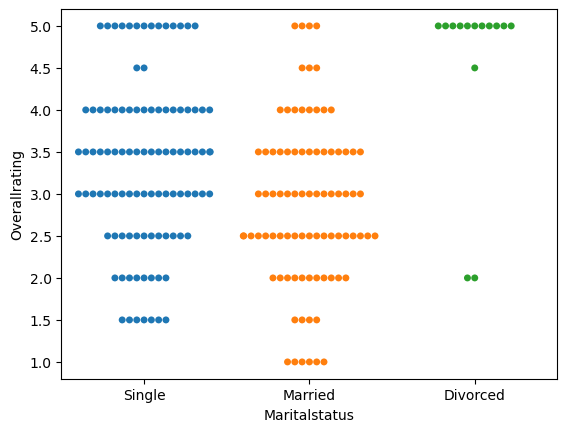

In [53]:
sns.swarmplot(data=data,x='Maritalstatus',y='Overallrating');

#### Cat plot

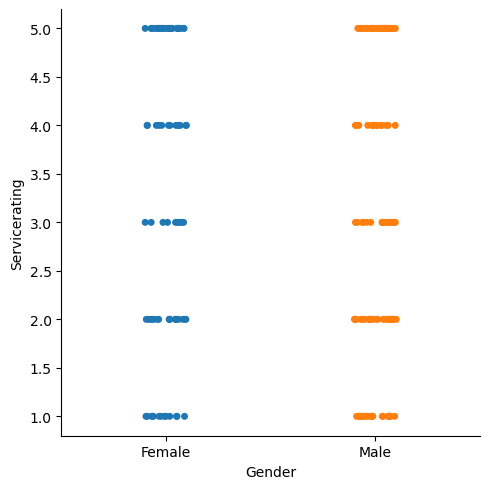

In [52]:
sns.catplot(data=data,x='Gender',y='Servicerating');

#### Correlation matrix or Heatmap

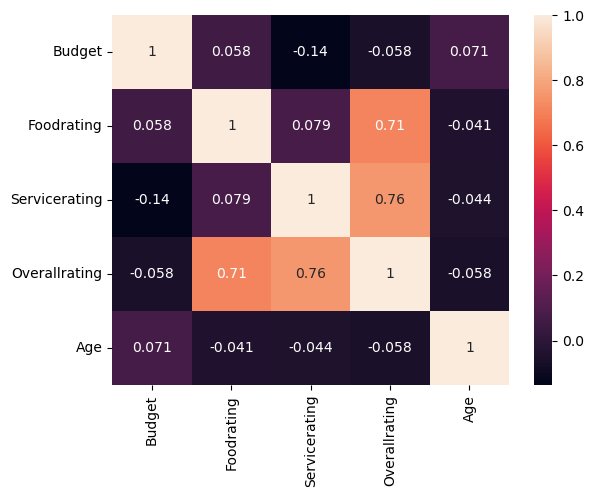

In [46]:
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Pair plot

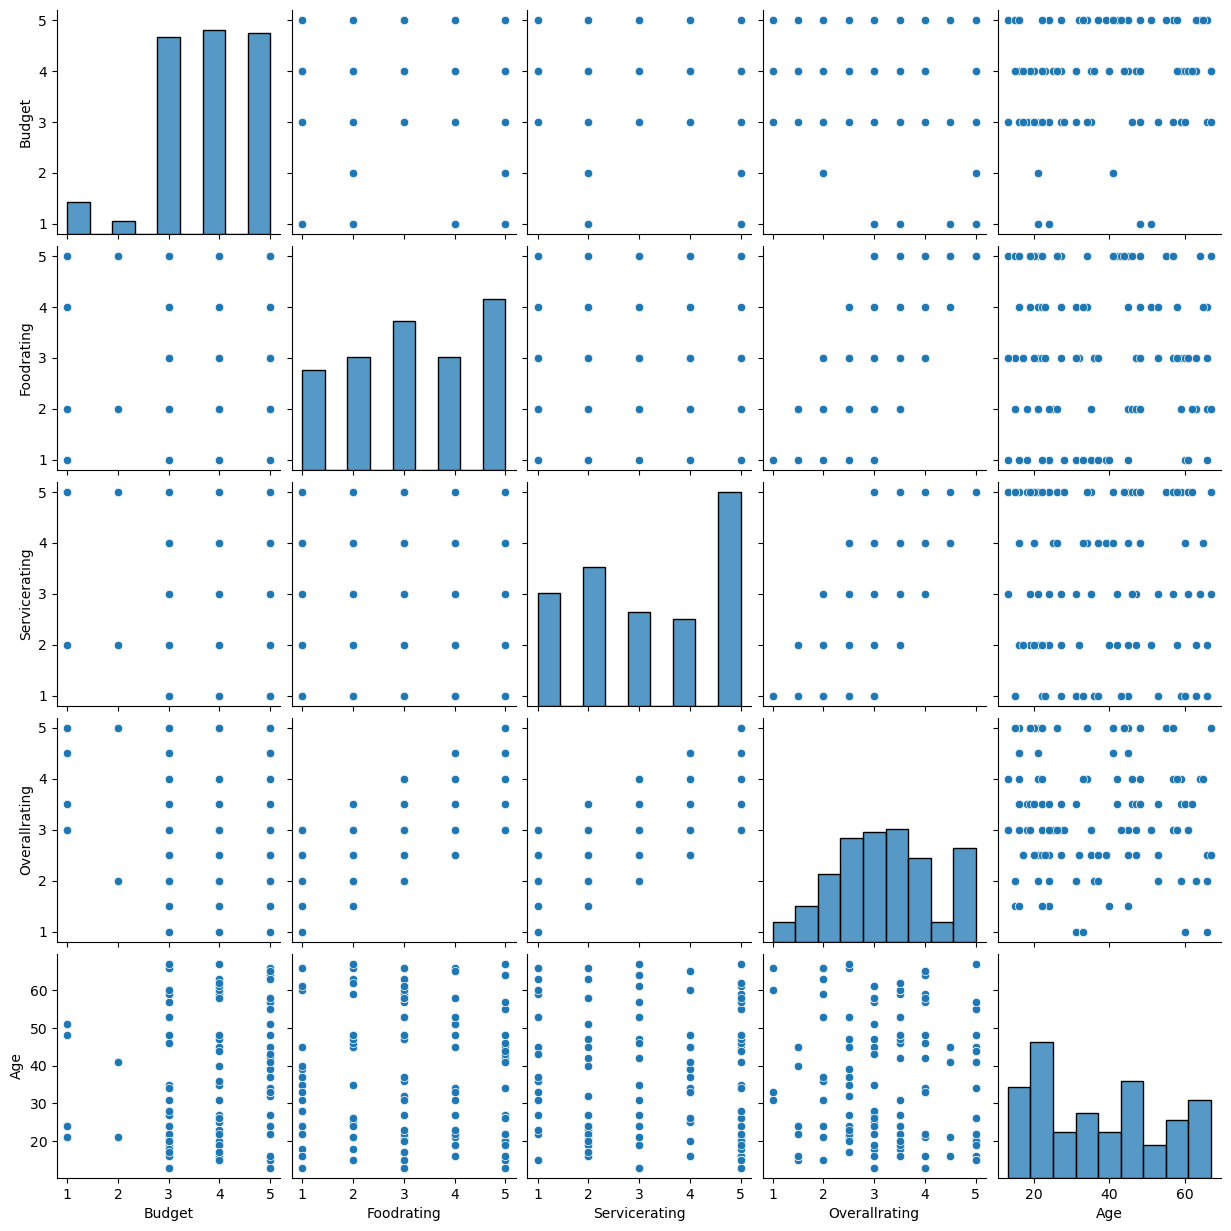

In [47]:
sns.pairplot(data=data)
plt.show()